#### installing packages
DESeq2, tried tidyverse but it's currently not working (but I can install and load ggplot?)

In [7]:
options(repr.plot.width=20, repr.plot.height=15)

In [1]:
library(DESeq2)
# this only works when i'm in r-env

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'BiocVersion', 'bslib', 'cpp11', 'dplyr', 'haven', 'htmlwidgets',
  'jsonlite', 'Matrix', 'nlme', 'RcppArmadillo', 'S4Vectors', 'scales',
  'shiny', 'stringi', 'testthat', 'tinytex', 'vctrs'



In [4]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



#### loading in data & cleaning

In [5]:
meta = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/CV_CE18_meta.csv")
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V


In [6]:
genes=read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/cv_COV.log", sep='\t')
head(genes)

,NC_035780.1,X3211540,X3221319,X772,X770,X414,X302,X834,X748,X280,⋯,X142,X164,X58,X444,X272,X142.1,X126,X10,X426,X6
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,3637453,3642340,78,49,15,18,50,60,12,⋯,14,6,0,4,16,4,10,46,18,2
2,NC_035780.1,3996431,4013875,104,106,62,36,103,107,40,⋯,27,20,6,84,36,42,24,6,47,0
3,NC_035780.1,4354976,4367161,141,92,64,42,123,138,60,⋯,44,48,13,66,44,85,10,94,34,2
4,NC_035780.1,5748109,5764084,180,4,138,4,42,10,4,⋯,64,2,0,2,8,0,0,0,2,0
5,NC_035780.1,8753904,8768743,0,0,0,0,4,0,2,⋯,0,8,0,0,0,8,4,0,0,0
6,NC_035780.1,10930683,10945734,20,68,18,2,8,6,10,⋯,36,0,0,50,2,0,14,0,2,0


cleaning genes dataframe - adding row and column names

In [8]:
# adding row names - assigns gene 1, gene2, etc
rownames(genes)=paste0("gene",1:NROW(genes))

# adding column names
colnames(genes)=c('gene', 'start', 'end', meta$unique_ID)

head(genes)

,gene,start,end,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,NC_035780.1,3637453,3642340,78,49,15,18,50,60,12,⋯,14,6,0,4,16,4,10,46,18,2
gene2,NC_035780.1,3996431,4013875,104,106,62,36,103,107,40,⋯,27,20,6,84,36,42,24,6,47,0
gene3,NC_035780.1,4354976,4367161,141,92,64,42,123,138,60,⋯,44,48,13,66,44,85,10,94,34,2
gene4,NC_035780.1,5748109,5764084,180,4,138,4,42,10,4,⋯,64,2,0,2,8,0,0,0,2,0
gene5,NC_035780.1,8753904,8768743,0,0,0,0,4,0,2,⋯,0,8,0,0,0,8,4,0,0,0
gene6,NC_035780.1,10930683,10945734,20,68,18,2,8,6,10,⋯,36,0,0,50,2,0,14,0,2,0


In [9]:
rownames(meta)=meta$unique_ID # grabs all the sample names
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V


i'm not really sure why sarah did this part ... her bedtools output might've had more info/looked different?

In [8]:
genedata=as.data.frame(genes[,1:10])
# assuming that genedata is the first 10 columns of genes, which must've been the gtf info
# my genes matrix only had 3 columns from the gtf file

counts=genes[,11:NCOL(genes), drop=FALSE]
counts
# so this must be the counts matrix from multicov - but again, doesn't apply to me

,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29,WBB-WBV-W69,WBG-BBB-W56,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,28,26,9,6,20,2,2,4,42,40,⋯,14,6,0,4,16,4,10,46,18,2
gene2,78,68,16,6,40,10,3,16,105,32,⋯,27,20,6,84,36,42,24,6,47,0
gene3,85,129,20,20,54,26,16,22,128,140,⋯,44,48,13,66,44,85,10,94,34,2
gene4,4,4,4,0,6,0,0,8,4,4,⋯,64,2,0,2,8,0,0,0,2,0
gene5,4,0,0,2,2,0,0,0,2,0,⋯,0,8,0,0,0,8,4,0,0,0
gene6,12,0,12,0,2,18,0,20,22,26,⋯,36,0,0,50,2,0,14,0,2,0
gene7,12,0,12,0,2,18,0,20,22,26,⋯,36,0,0,50,2,0,14,0,2,0
gene8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,2,0,0,0,0,0,0
gene9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


setting the unique IDs as the rownames for meta - also adding two columns that combine the treatment conditions for phase 1 and phase 2

In [9]:
# creating list of unique_ID from meta to be used as column names in loc_data
rowname_meta = meta$unique_ID
meta$TC1 = paste(meta$T1_oxygen, meta$T1_temp)
meta$TC2 = paste(meta$T2_oxygen, meta$T2_temp)
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic ambient,hypoxic ambient
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic ambient,normoxic ambient


reading in gtf and gff file - although maybe not necessary?

think i determined that i only need to work with gtf file too?

In [29]:
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gtf"

# Read GTF file with read.table
gtf_data <- read.table(gtf_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# If your GTF file has a header, you can add column names manually
# Replace "your_column_names" with the actual names in your file
colnames(gtf_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

trying to match up gtf file with genes file (counts matrix) - although might not need to do rn

In [10]:
# Print the first few rows of the data
head(filter(gtf_data, gtf_data$feature == 'gene'))
# comparing gene, start, end values between the two data frames
head(genes)

ERROR: Error in eval(expr, envir, enclos): object 'gtf_data' not found


In [42]:
tail(genes)

,gene,start,end,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1668,NC_035789.1,30004204,30008242,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
gene1669,NC_035789.1,30738330,30741520,66,23,18,31,60,77,12,⋯,18,6,2,10,6,24,2,2,6,0
gene1670,NC_035789.1,30738330,30741520,66,23,18,31,60,77,12,⋯,18,6,2,10,6,24,2,2,6,0
gene1671,NC_035789.1,31212244,31249656,10,0,2,0,0,0,8,⋯,2,12,0,2,0,0,2,2,0,0
gene1672,NC_035789.1,31741990,31744522,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
gene1673,NC_035789.1,31806639,31811365,32,46,4,10,21,28,6,⋯,8,2,2,6,6,4,0,0,14,0


In [33]:
gff_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gff"

# Read GFF file with read.table
gff_data <- read.table(gff_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# If your GFF file has a header, you can add column names manually
# Replace "your_column_names" with the actual names in your file
colnames(gff_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

# Print the first few rows of the data
head(gff_data)


,seqname,source,feature,start,end,score,strand,frame,attributes
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,NC_035780.1,RefSeq,region,1,65668440,.,+,.,ID=NC_035780.1:1..65668440;Dbxref=taxon:6565;Name=1;chromosome=1;collection-date=22-Mar-2015;country=USA;gbkey=Src;genome=chromosome;isolate=RU13XGHG1-28;isolation-source=Rutgers Haskin Shellfish Research Laboratory inbred lines (NJ);mol_type=genomic DNA;tissue-type=whole sample
2,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,ID=gene-LOC111116054;Dbxref=GeneID:111116054;Name=LOC111116054;gbkey=Gene;gene=LOC111116054;gene_biotype=lncRNA
3,NC_035780.1,Gnomon,lnc_RNA,13578,14594,.,+,.,"ID=rna-XR_002636969.1;Parent=gene-LOC111116054;Dbxref=GeneID:111116054,Genbank:XR_002636969.1;Name=XR_002636969.1;gbkey=ncRNA;gene=LOC111116054;model_evidence=Supporting evidence includes similarity to: 100%25 coverage of the annotated genomic feature by RNAseq alignments%2C including 1 sample with support for all annotated introns;product=uncharacterized LOC111116054;transcript_id=XR_002636969.1"
4,NC_035780.1,Gnomon,exon,13578,13603,.,+,.,"ID=exon-XR_002636969.1-1;Parent=rna-XR_002636969.1;Dbxref=GeneID:111116054,Genbank:XR_002636969.1;gbkey=ncRNA;gene=LOC111116054;product=uncharacterized LOC111116054;transcript_id=XR_002636969.1"
5,NC_035780.1,Gnomon,exon,14237,14290,.,+,.,"ID=exon-XR_002636969.1-2;Parent=rna-XR_002636969.1;Dbxref=GeneID:111116054,Genbank:XR_002636969.1;gbkey=ncRNA;gene=LOC111116054;product=uncharacterized LOC111116054;transcript_id=XR_002636969.1"
6,NC_035780.1,Gnomon,exon,14557,14594,.,+,.,"ID=exon-XR_002636969.1-3;Parent=rna-XR_002636969.1;Dbxref=GeneID:111116054,Genbank:XR_002636969.1;gbkey=ncRNA;gene=LOC111116054;product=uncharacterized LOC111116054;transcript_id=XR_002636969.1"


#### analysis 1 - controlling for phase 2 treatments

In [16]:
# looking at samples that had hypoxic warm for treatment 2
meta_hw=meta[meta$TC2=="hypoxic warm",]
dim(meta_hw)

[1] 10 13

In [17]:
# returning T/F for samples in that specific treatment
colnames(counts) %in% meta_hw$unique_ID

logical(0)

In [18]:
# creating new df that only has samples with that specific treatment 2
counts_hw = genes[,colnames(genes) %in% meta_hw$unique_ID, drop=FALSE]
counts_hw

,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,6,20,2,2,4,4,10,46,18,2
gene2,6,40,10,3,16,42,24,6,47,0
gene3,20,54,26,16,22,85,10,94,34,2
gene4,0,6,0,0,8,0,0,0,2,0
gene5,2,2,0,0,0,8,4,0,0,0
gene6,0,2,18,0,20,0,14,0,2,0
gene7,0,2,18,0,20,0,14,0,2,0
gene8,0,0,0,0,0,0,0,0,0,0
gene9,0,0,0,0,0,0,0,0,0,0


In [19]:
# checking that things make sense
dim(counts_hw)
dim(genes)

[1] 1673   10

[1] 1673   33

In [20]:
dds_hw <- DESeqDataSetFromMatrix(countData = counts_hw,
                              colData = meta_hw,
                              design= ~ TC1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [21]:
# prefiltering
keep <- rowSums(counts(dds_hw)) >= 5
dds_hw <- dds_hw[keep,]

In [22]:
dds_hw <- DESeq(dds_hw)
res <- results(dds_hw)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



In [23]:
summary(res)


out of 940 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.11%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 13, 1.4%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



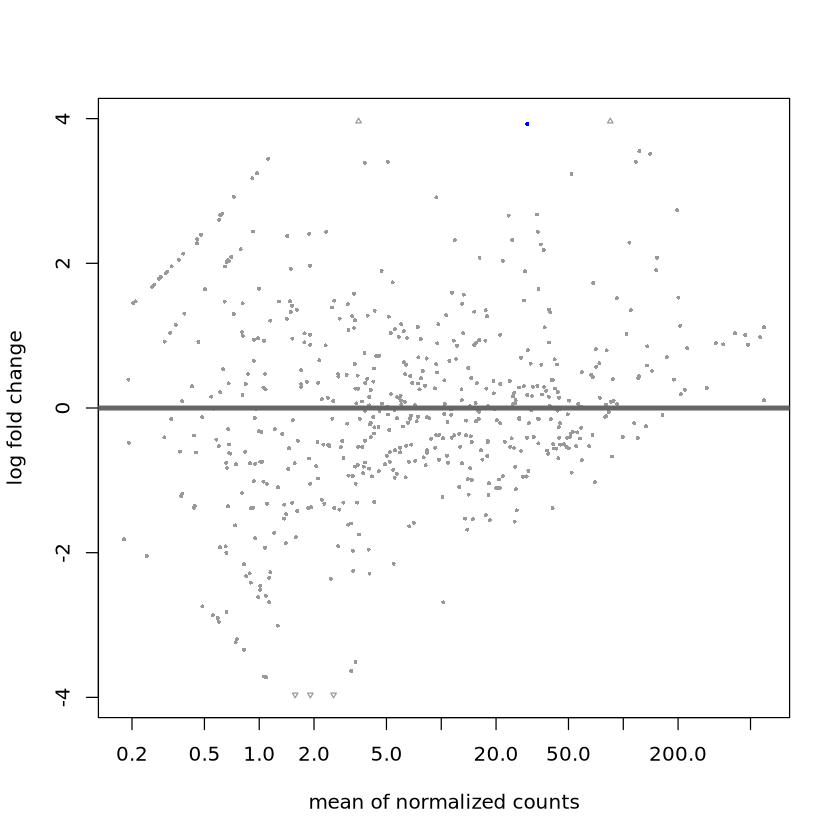

In [24]:
plotMA(res)

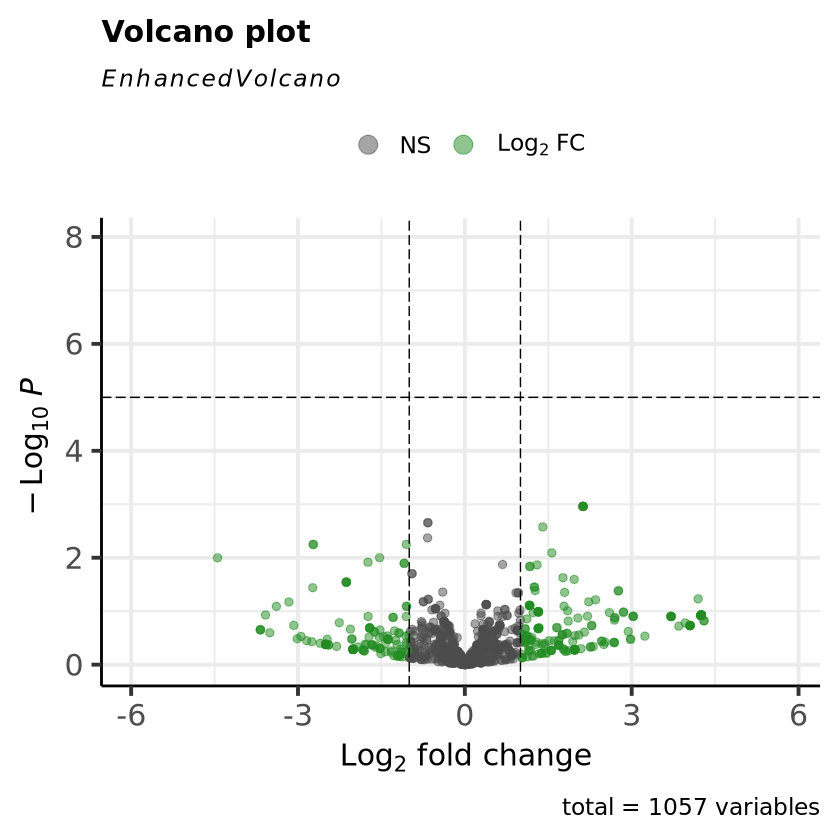

In [35]:
EnhancedVolcano(res,
                lab=NA,
                x='log2FoldChange',
                y='pvalue')

In [53]:
resultsNames(dds_hw)

[1] "Intercept"                         "TC1_normoxic.warm_vs_hypoxic.warm"

In [54]:
res=results(dds_hw, name='TC1_normoxic.warm_vs_hypoxic.warm')

In [55]:
rownames(res) 

[1] "gene1"    "gene2"    "gene3"    "gene4"    "gene5"    "gene6"   
   [7] "gene7"    "gene8"    "gene9"    "gene10"   "gene11"   "gene12"  
  [13] "gene13"   "gene14"   "gene15"   "gene16"   "gene17"   "gene18"  
  [19] "gene19"   "gene20"   "gene21"   "gene22"   "gene23"   "gene24"  
  [25] "gene25"   "gene26"   "gene27"   "gene28"   "gene29"   "gene30"  
  [31] "gene31"   "gene32"   "gene33"   "gene34"   "gene35"   "gene36"  
  [37] "gene37"   "gene38"   "gene39"   "gene40"   "gene41"   "gene42"  
  [43] "gene43"   "gene44"   "gene45"   "gene46"   "gene47"   "gene48"  
  [49] "gene49"   "gene50"   "gene51"   "gene52"   "gene53"   "gene54"  
  [55] "gene55"   "gene56"   "gene57"   "gene58"   "gene59"   "gene60"  
  [61] "gene61"   "gene62"   "gene63"   "gene64"   "gene65"   "gene66"  
  [67] "gene67"   "gene68"   "gene69"   "gene70"   "gene71"   "gene72"  
  [73] "gene73"   "gene74"   "gene75"   "gene76"   "gene77"   "gene78"  
  [79] "gene79"   "gene80"   "gene81"   "gene82"   "gene83"   "gene84"  
  [85] "gene85"   "gene86"   "gene87"   "gene88"   "gene89"   "gene90"  
  [91] "gene91"   "gene92"   "gene93"   "gene94"   "gene95"   "gene96"  
  [97] "gene97"   "gene98"   "gene99"   "gene100"  "gene101"  "gene102" 
 [103] "gene103"  "gene104"  "gene105"  "gene106"  "gene107"  "gene108" 
 [109] "gene109"  "gene110"  "gene111"  "gene112"  "gene113"  "gene114" 
 [115] "gene115"  "gene116"  "gene117"  "gene118"  "gene119"  "gene120" 
 [121] "gene121"  "gene122"  "gene123"  "gene124"  "gene125"  "gene126" 
 [127] "gene127"  "gene128"  "gene129"  "gene130"  "gene131"  "gene132" 
 [133] "gene133"  "gene134"  "gene135"  "gene136"  "gene137"  "gene138" 
 [139] "gene139"  "gene140"  "gene141"  "gene142"  "gene143"  "gene144" 
 [145] "gene145"  "gene146"  "gene147"  "gene148"  "gene149"  "gene150" 
 [151] "gene151"  "gene152"  "gene153"  "gene154"  "gene155"  "gene156" 
 [157] "gene157"  "gene158"  "gene159"  "gene160"  "gene161"  "gene162" 
 [163] "gene163"  "gene164"  "gene165"  "gene166"  "gene167"  "gene168" 
 [169] "gene169"  "gene170"  "gene171"  "gene172"  "gene173"  "gene174" 
 [175] "gene175"  "gene176"  "gene177"  "gene178"  "gene179"  "gene180" 
 [181] "gene181"  "gene182"  "gene183"  "gene184"  "gene185"  "gene186" 
 [187] "gene187"  "gene188"  "gene189"  "gene190"  "gene191"  "gene192" 
 [193] "gene193"  "gene194"  "gene195"  "gene196"  "gene197"  "gene198" 
 [199] "gene199"  "gene200"  "gene201"  "gene202"  "gene203"  "gene204" 
 [205] "gene205"  "gene206"  "gene207"  "gene208"  "gene209"  "gene210" 
 [211] "gene211"  "gene212"  "gene213"  "gene214"  "gene215"  "gene216" 
 [217] "gene217"  "gene218"  "gene219"  "gene220"  "gene221"  "gene222" 
 [223] "gene223"  "gene224"  "gene225"  "gene226"  "gene227"  "gene228" 
 [229] "gene229"  "gene230"  "gene231"  "gene232"  "gene233"  "gene234" 
 [235] "gene235"  "gene236"  "gene237"  "gene238"  "gene239"  "gene240" 
 [241] "gene241"  "gene242"  "gene243"  "gene244"  "gene245"  "gene246" 
 [247] "gene247"  "gene248"  "gene249"  "gene250"  "gene251"  "gene252" 
 [253] "gene253"  "gene254"  "gene255"  "gene256"  "gene257"  "gene258" 
 [259] "gene259"  "gene260"  "gene261"  "gene262"  "gene263"  "gene264" 
 [265] "gene265"  "gene266"  "gene267"  "gene268"  "gene269"  "gene270" 
 [271] "gene271"  "gene272"  "gene273"  "gene274"  "gene275"  "gene276" 
 [277] "gene277"  "gene278"  "gene279"  "gene280"  "gene281"  "gene282" 
 [283] "gene283"  "gene284"  "gene285"  "gene286"  "gene287"  "gene288" 
 [289] "gene289"  "gene290"  "gene291"  "gene292"  "gene293"  "gene294" 
 [295] "gene295"  "gene296"  "gene297"  "gene298"  "gene299"  "gene300" 
 [301] "gene301"  "gene302"  "gene303"  "gene304"  "gene305"  "gene306" 
 [307] "gene307"  "gene308"  "gene309"  "gene310"  "gene311"  "gene312" 
 [313] "gene313"  "gene314"  "gene315"  "gene316"  "gene317"  "gene318" 
 [319] "gene319"  "gene320"  "gene321"  "gene322"  "gene323"  "gene324" 
 [325] "gene325"  "gene326"  "gene327"  "gene328"  "gene329" 

In [56]:
sig1_stress = res[which(res$padj < 0.05),] # only have one significant gene tho..

In [57]:
dim(sig1_stress)

[1] 1 6

In [58]:
sig1_stress=as.data.frame(sig1_stress)
sig1_stress

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gene211,29.63906,3.926991,0.8438211,4.65382,3.258419e-06,0.003551677


i've read that htseq-counts by default looks at exons - want to see if the number of rows for the htseq-counts matrix matches to the number of exons in the gtf file

In [3]:
# reading in counts data
counts_data <- read.table("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/pipeline_work_seq/bowtie2/htseq-counts/counts (1).txt", sep="\t")
counts_data <- counts_data[-1,]
# reading in column data
colData <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CV_CE18_meta.csv")

# changing rownames of counts_data to have the gene names
rownames(counts_data) = counts_data$genes
counts_data$genes <- NULL # deleting genes column
# rownames of the colData becomes the short unique sample ID
rownames(colData) = colData$unique_ID
rownames(colData)
# changing column names of counts_data to match colData
colnames(counts_data) = c("genes",rownames(colData))
colnames(counts_data)

# should have same number of colData rows and counts_data columns and should be in the same order
dim(counts_data) # 30 columns
dim(colData) # 30 rows
# are all colnames in counts_data in rownames in colData?
all(colnames(counts_data) %in% rownames(colData)) # TRUE
# are they all in the same order?
all(colnames(counts_data) == rownames(colData)) # TRUE

# creating design factors
colData$TC1 = paste(colData$T1_oxygen, colData$T1_temp)
colData$TC2 = paste(colData$T2_oxygen, colData$T2_temp)

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "BPO-BPO-O16" "BPR-BPG-O38" "BPR-BPR-O02" "BPY-BPG-O42" "BPY-BPY-O29"
[16] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[21] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"
[26] "WPB-BPG-G45" "WPO-BPO-G16" "WPO-BPY-G28" "WPR-BPY-G25" "WPV-BPR-G11"

[1] "genes"       "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27"
 [6] "BBO-WBO-B16" "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26"
[11] "BBY-WBG-B42" "BPO-BPO-O16" "BPR-BPG-O38" "BPR-BPR-O02" "BPY-BPG-O42"
[16] "BPY-BPY-O29" "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03"
[21] "WBO-WBV-W64" "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65"
[26] "WBY-BBY-W30" "WPB-BPG-G45" "WPO-BPO-G16" "WPO-BPY-G28" "WPR-BPY-G25"
[31] "WPV-BPR-G11"

[1] 38833    31

[1] 30 11

[1] FALSE

Warning message in colnames(counts_data) == rownames(colData):
“longer object length is not a multiple of shorter object length”


[1] FALSE

In [4]:
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gtf"

# Read GTF file with read.table
gtf_data <- read.table(gtf_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# adding column names
colnames(gtf_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

# Print the first few rows of the data
head(gtf_data)

,seqname,source,feature,start,end,score,strand,frame,attributes
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,"gene_id ""LOC111116054""; db_xref ""GeneID:111116054""; gbkey ""Gene""; gene ""LOC111116054""; gene_biotype ""lncRNA"";"
2,NC_035780.1,Gnomon,exon,13578,13603,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""1"";"
3,NC_035780.1,Gnomon,exon,14237,14290,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""2"";"
4,NC_035780.1,Gnomon,exon,14557,14594,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""3"";"
5,NC_035780.1,Gnomon,gene,28961,33324,.,+,.,"gene_id ""LOC111126949""; db_xref ""GeneID:111126949""; gbkey ""Gene""; gene ""LOC111126949""; gene_biotype ""protein_coding"";"
6,NC_035780.1,Gnomon,exon,28961,29073,.,+,.,"gene_id ""LOC111126949""; transcript_id ""XM_022471938.1""; db_xref ""GeneID:111126949""; gbkey ""mRNA""; gene ""LOC111126949""; model_evidence ""Supporting evidence includes similarity to: 3 Proteins, and 100% coverage of the annotated genomic feature by RNAseq alignments, including 21 samples with support for all annotated introns""; product ""UNC5C-like protein""; exon_number ""1"";"


#### controlling for normal/ambient for TC1

In [26]:
meta_na=meta[meta$TC1=="normoxic ambient",]
dim(meta_na) #10 samples
head(meta_na)

[1] 10 13

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,normoxic ambient,normoxic ambient
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,normoxic ambient,hypoxic ambient
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,normoxic ambient,normoxic ambient
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,normoxic ambient,hypoxic ambient
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,normoxic ambient,normoxic ambient
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,normoxic ambient,hypoxic ambient


In [27]:
counts_na = genes[,colnames(genes) %in% rownames(meta_na)]
dim(counts_na) #10 samples

[1] 1673   10

In [39]:
dds_na <- DESeqDataSetFromMatrix(countData = counts_na,
                              colData = meta_na,
                              design= ~ T2_oxygen)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [40]:
# prefiltering
#keep <- rowSums(counts(dds_na)) >= 5
#dds_na <- dds_na[keep,]
dds_na <- DESeq(dds_na)
res <- results(dds_na)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 1188 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 15, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



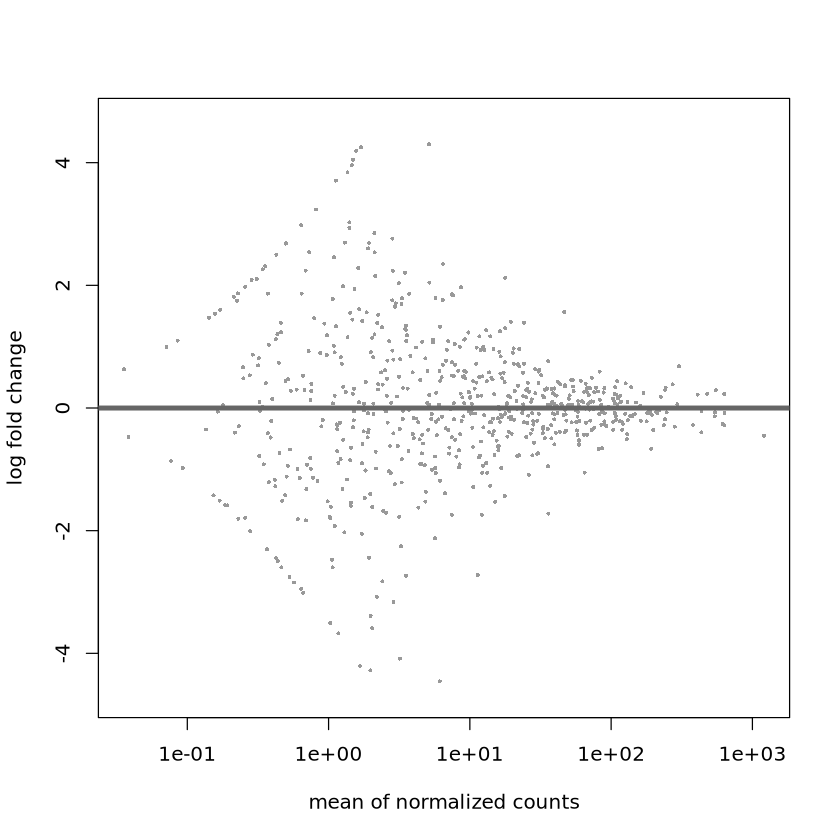

In [41]:
summary(res)
plotMA(res)

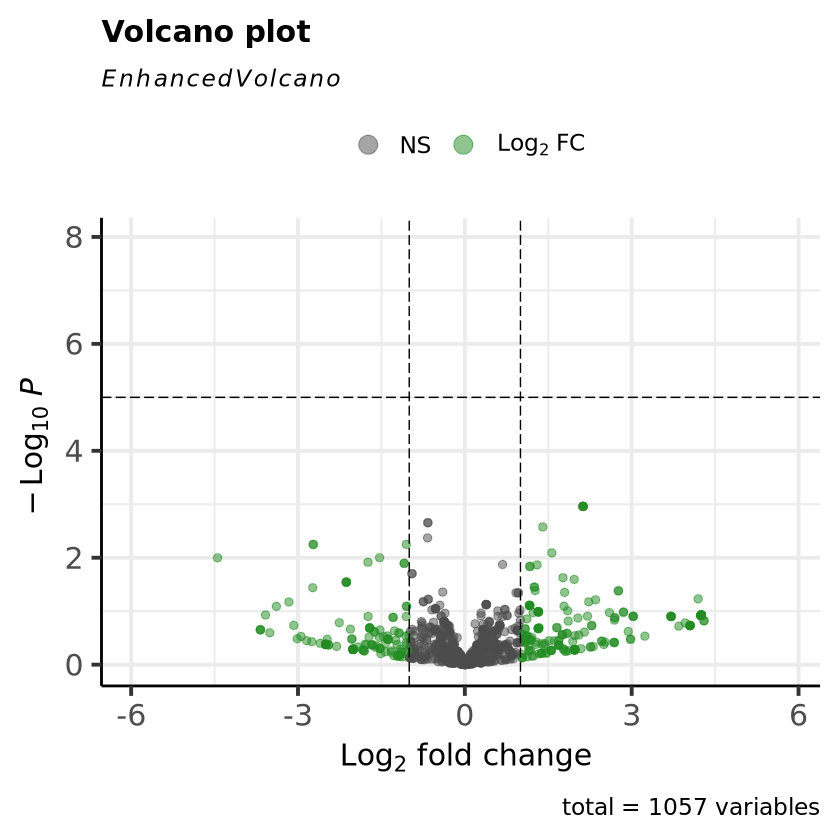

In [33]:
EnhancedVolcano(res,lab=NA,x='log2FoldChange',y='pvalue')

#### controlling for treatment 1 oxygen and comparing to treatment 2 oxygen

In [43]:
meta

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic ambient,hypoxic ambient
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic ambient,hypoxic ambient
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic ambient,hypoxic ambient
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient


In [47]:
meta_h=meta[meta$T1_oxygen=="hypoxic",]
meta_h

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic ambient,hypoxic ambient
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic ambient,hypoxic ambient
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic ambient,hypoxic ambient
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient


In [50]:
counts_h = genes[,rownames(meta_h)]
counts_h

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,78,49,15,18,50,60,12,28,26,9,6,20,2,2,4
gene2,104,106,62,36,103,107,40,78,68,16,6,40,10,3,16
gene3,141,92,64,42,123,138,60,85,129,20,20,54,26,16,22
gene4,180,4,138,4,42,10,4,4,4,4,0,6,0,0,8
gene5,0,0,0,0,4,0,2,4,0,0,2,2,0,0,0
gene6,20,68,18,2,8,6,10,12,0,12,0,2,18,0,20
gene7,20,68,18,2,8,6,10,12,0,12,0,2,18,0,20
gene8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
dds_h <- DESeqDataSetFromMatrix(countData = counts_h,
                              colData = meta_h,
                              design= ~ T2_oxygen)
# prefiltering
#keep <- rowSums(counts(dds_na)) >= 5
#dds_na <- dds_na[keep,]
dds_h <- DESeq(dds_h)
res <- results(dds_h)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 12 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 1227 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 20, 1.6%
LFC < 0 (down)     : 57, 4.6%
outliers [1]       : 6, 0.49%
low counts [2]     : 396, 32%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



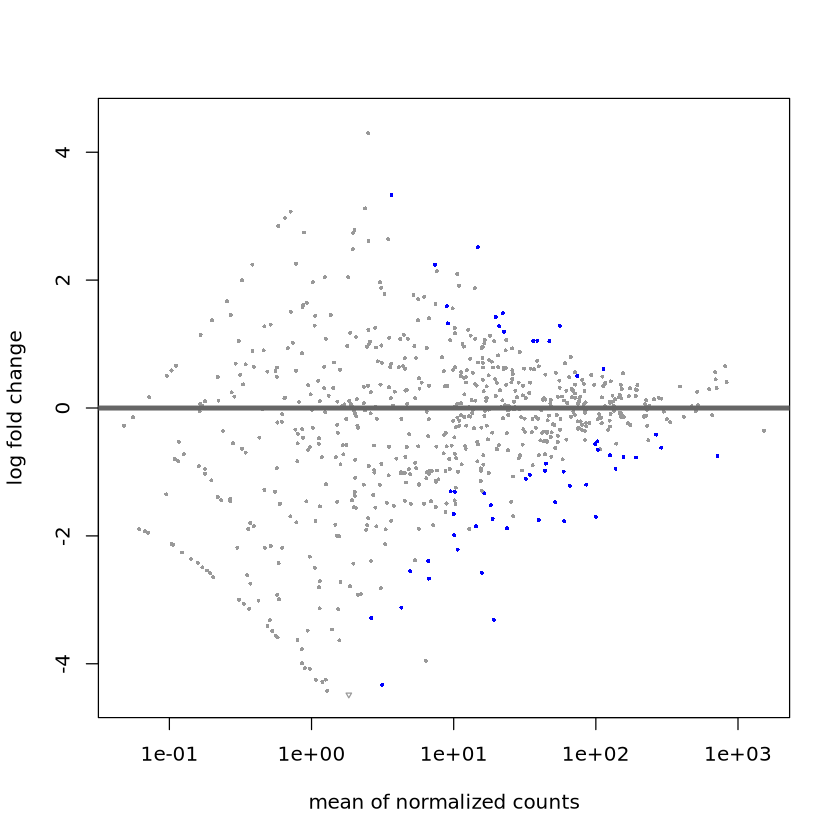

In [53]:
summary(res)
plotMA(res)

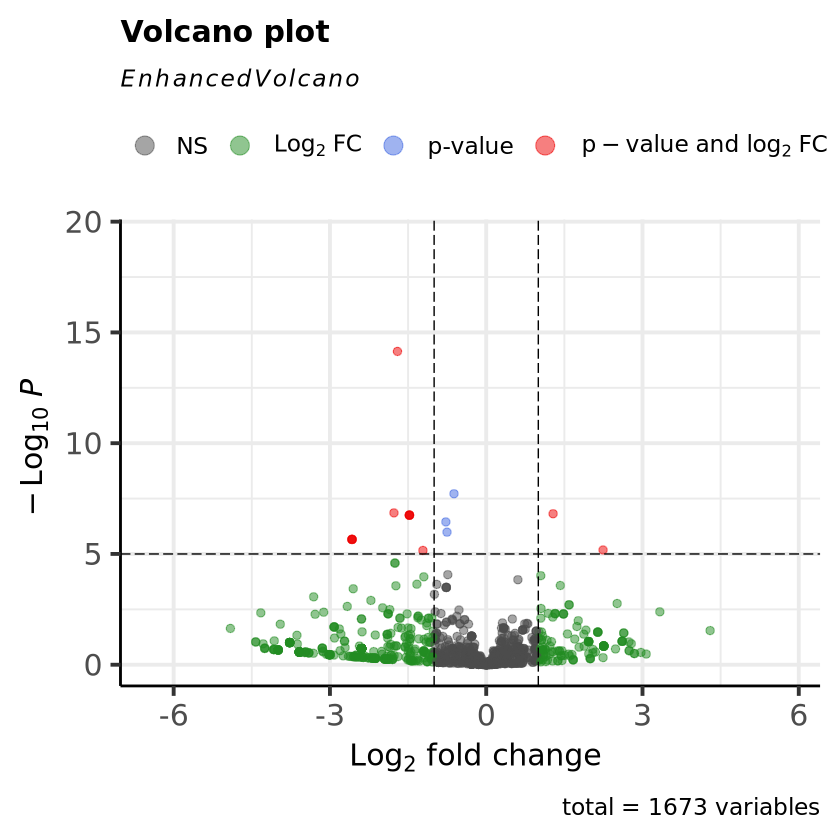

In [56]:
EnhancedVolcano(res, lab=NA, x='log2FoldChange', y='pvalue')

In [64]:
resultsNames(dds_h) # 'Intercept''T2_oxygen_normoxic_vs_hypoxic'

res=results(dds_h, name="T2_oxygen_normoxic_vs_hypoxic")

sig2_ox = res[which(res$padj < 0.05), ]
dim(sig2_ox) # 37 sig genes

[1] "Intercept"                     "T2_oxygen_normoxic_vs_hypoxic"

[1] 37  6

#### controlling for t1 oxygen and looking at t2 temp

In [70]:
meta_h
counts_h

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic ambient,hypoxic ambient
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic ambient,normoxic ambient
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic ambient,normoxic ambient
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic ambient,hypoxic ambient
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic ambient,hypoxic ambient
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic ambient,hypoxic ambient


,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,78,49,15,18,50,60,12,28,26,9,6,20,2,2,4
gene2,104,106,62,36,103,107,40,78,68,16,6,40,10,3,16
gene3,141,92,64,42,123,138,60,85,129,20,20,54,26,16,22
gene4,180,4,138,4,42,10,4,4,4,4,0,6,0,0,8
gene5,0,0,0,0,4,0,2,4,0,0,2,2,0,0,0
gene6,20,68,18,2,8,6,10,12,0,12,0,2,18,0,20
gene7,20,68,18,2,8,6,10,12,0,12,0,2,18,0,20
gene8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
dds_h <- DESeqDataSetFromMatrix(countData = counts_h,
                              colData = meta_h,
                              design= ~ T2_temp)
# prefiltering
#keep <- rowSums(counts(dds_na)) >= 5
#dds_na <- dds_na[keep,]
dds_h <- DESeq(dds_h)
res <- results(dds_h)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 23 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 1227 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 13, 1.1%
LFC < 0 (down)     : 18, 1.5%
outliers [1]       : 2, 0.16%
low counts [2]     : 559, 46%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



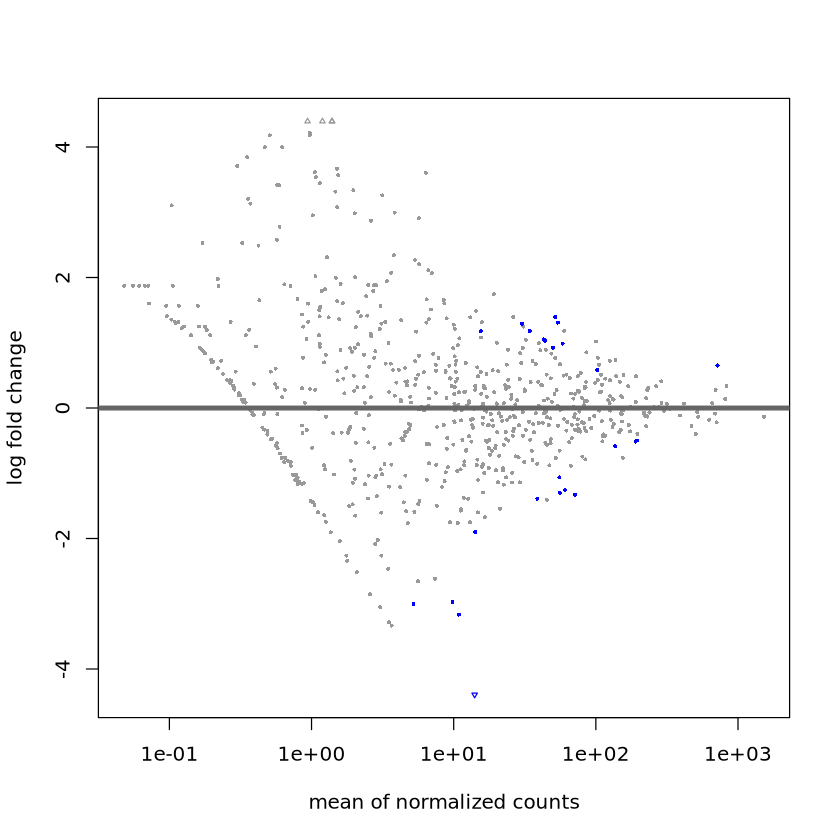

In [73]:
summary(res)
plotMA(res)

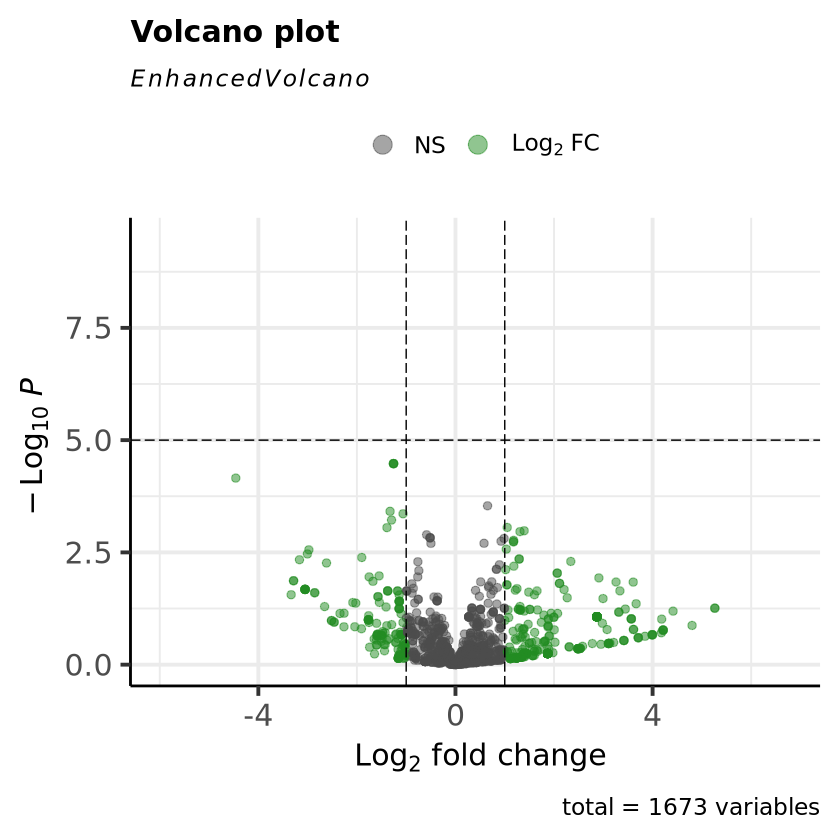

In [76]:
EnhancedVolcano(res, lab=NA, x='log2FoldChange', y='pvalue')

#### controlling for tc1, comparing to tc2

In [88]:
meta_tc1 = meta[meta$TC1 == 'normoxic ambient',]
meta_tc1

counts_tc1 = genes[,rownames(meta_tc1)]
counts_tc1

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,normoxic ambient,normoxic ambient
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,normoxic ambient,hypoxic ambient
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,normoxic ambient,normoxic ambient
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,normoxic ambient,hypoxic ambient
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,normoxic ambient,normoxic ambient
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,normoxic ambient,hypoxic ambient
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,normoxic ambient,normoxic ambient
WBV-WBR-W12,2018--WBV-WBR-W12-CV,WBV-WBR-W12,WBV,WBR,W12,normoxic,ambient,V,normoxic,ambient,R,normoxic ambient,normoxic ambient
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,normoxic ambient,hypoxic ambient


,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,42,40,4,8,20,14,6,0,4,16
gene2,105,32,14,4,87,27,20,6,84,36
gene3,128,140,16,6,91,44,48,13,66,44
gene4,4,4,28,4,2,64,2,0,2,8
gene5,2,0,0,0,14,0,8,0,0,0
gene6,22,26,2,4,4,36,0,0,50,2
gene7,22,26,2,4,4,36,0,0,50,2
gene8,0,0,0,0,0,0,0,0,2,0
gene9,0,0,0,0,0,0,0,0,0,0


In [89]:
dds_tc1 <- DESeqDataSetFromMatrix(countData = counts_tc1,
                              colData = meta_tc1,
                              design= ~ TC2)
# prefiltering
#keep <- rowSums(counts(dds_na)) >= 5
#dds_na <- dds_na[keep,]
dds_tc1 <- DESeq(dds_tc1)
res <- results(dds_tc1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 


out of 1188 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 15, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



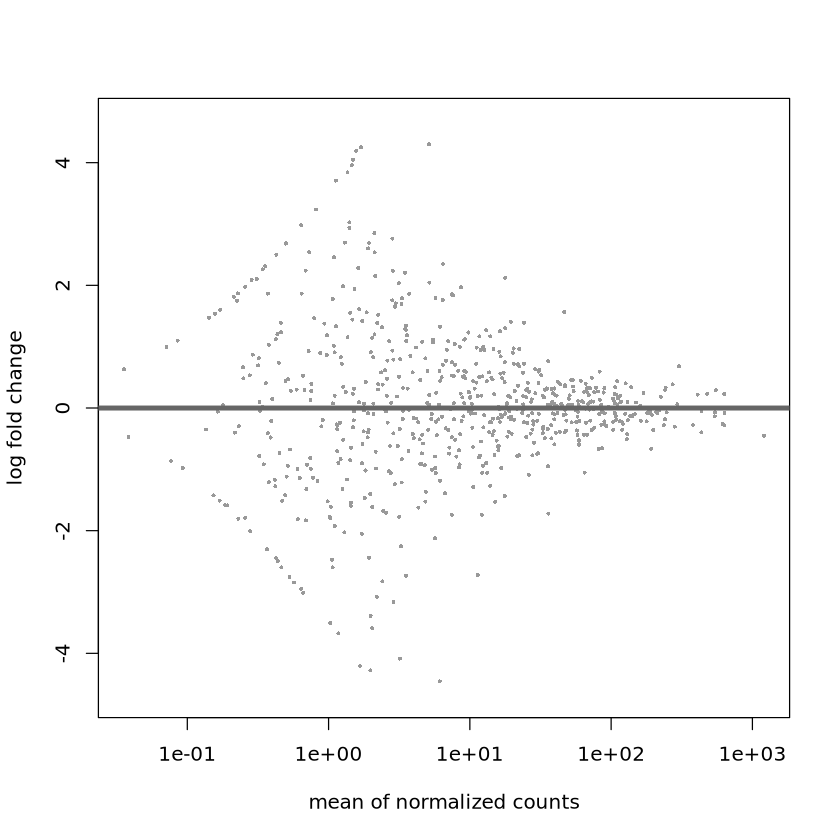

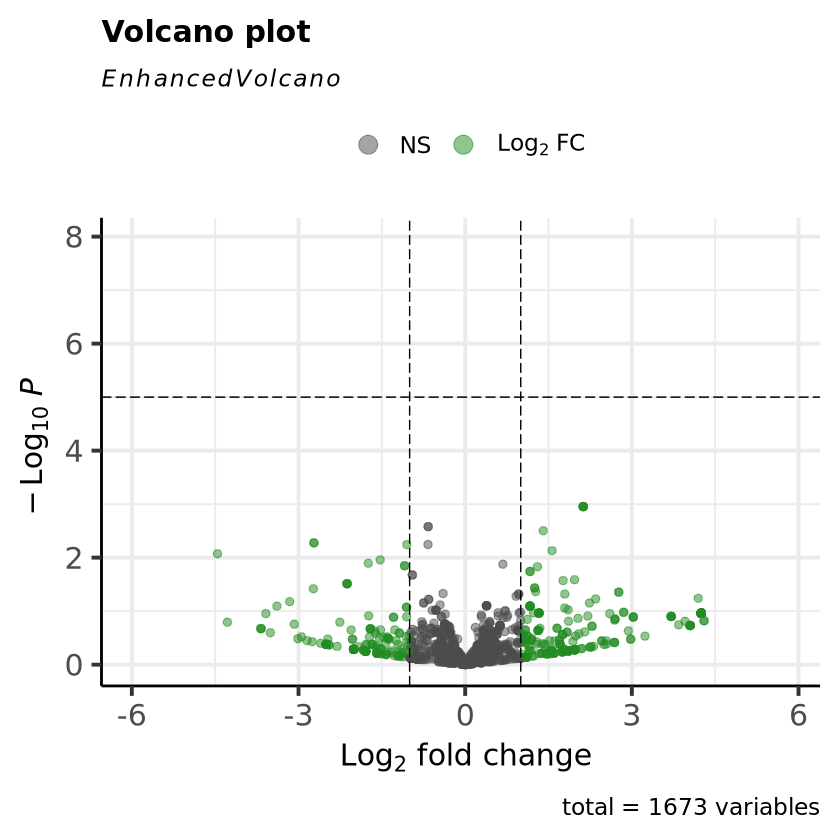

In [92]:
summary(res)
plotMA(res)

EnhancedVolcano(res, lab=NA, x='log2FoldChange', y='pvalue')